In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.tri as tri
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib.colors import Normalize
%matplotlib inline

# 0. Functions

In [3]:
def getstats(db):
    stat = {}
    for unc in uncs:
        stat['unc' + str(unc)] = stats.describe(db['LLunc'+str(unc)])
        print('{}% Unc Stats: {} \n'.format(unc*100, stat['unc'+str(unc)]))
    return stat

# 1. Retreive LL calc results

## (a) LL calcs for uncertainty = 5%, 10%, 15%, 20%

In [4]:
lbls = ['ReactorType', 'CoolingTime', 'Enrichment', 'Burnup', 'OrigenReactor']
nonlbls = ['AvgPowerDensity', 'ModDensity', 'UiWeight']

In [86]:
results = '~/sims_n_results/final_sims_nov2020/mll/full_ll/'

uncs = [0.05, 0.1, 0.15, 0.2]
job_dirs = ['Job' + str(i) + '_unc' + str(unc) for i, unc in enumerate(uncs)]
ll = {}
for i, unc_job in enumerate(job_dirs):
    csv = unc_job + '/' + unc_job + '.csv'
    if i == 0:
        ll['good'] = pd.read_csv(results + 'train_good/' + csv).drop(columns=['Unnamed: 0', 'Unnamed: 0.1']).rename(columns={'LL':'LLunc'+str(uncs[i])})
        ll['bad'] = pd.read_csv(results + 'train_bad/' + csv).drop(columns=['Unnamed: 0', 'Unnamed: 0.1']).rename(columns={'LL':'LLunc'+str(uncs[i])})
    else:
        ll['good']['LLunc'+str(uncs[i])] = pd.read_csv(results + 'train_good/' + csv)['LL']
        ll['bad']['LLunc'+str(uncs[i])] = pd.read_csv(results + 'train_bad/' + csv)['LL']

In [73]:
ll['bad'].columns

Index(['AvgPowerDensity', 'Burnup', 'CoolingTime', 'Enrichment', 'ModDensity',
       'OrigenReactor', 'ReactorType', 'UiWeight', 'am241', 'am242m', 'am243',
       'cm242', 'cm244', 'cs134', 'cs137', 'eu154', 'nd143', 'nd144', 'nd145',
       'nd146', 'nd148', 'nd150', 'np237', 'pu238', 'pu239', 'pu240', 'pu241',
       'pu242', 'sm147', 'sm149', 'sm150', 'sm151', 'sm152', 'u234', 'u235',
       'u236', 'u238', 'LLunc0.05', 'LLunc0.1', 'LLunc0.15', 'LLunc0.2'],
      dtype='object')

## (b) Test samples for LL calcs

In [74]:
g = pd.read_pickle('../mll_calc/htc_files/train_good.pkl')
g

,AvgPowerDensity,Burnup,CoolingTime,Enrichment,ModDensity,OrigenReactor,ReactorType,UiWeight,am241,am242m,...,pu242,sm147,sm149,sm150,sm151,sm152,u234,u235,u236,u238
470037,41.0,1878.95,6878.110557,5.4,0.71,s18x18,pwr,1,1.071,0.000006,...,0.01683,27.28,3.888,10.32,3.923,4.715,348.8,51710.0,630.0,944500.0


In [75]:
b = pd.read_pickle('../mll_calc/htc_files/train_bad.pkl')
b

,AvgPowerDensity,Burnup,CoolingTime,Enrichment,ModDensity,OrigenReactor,ReactorType,UiWeight,am241,am242m,...,pu242,sm147,sm149,sm150,sm151,sm152,u234,u235,u236,u238
230410,22.0,6085.43,698.65191,1.36,0.7,atrium10x10-9,bwr,1,21.45,0.01952,...,25.54,33.13,1.648,49.01,3.789,28.25,308.9,8541.0,1018.0,980200.0


In [87]:
# for reference
to_print = ['sim_idx', 'pred_idx', 'MaxLogLL',
            'AvgPowerDensity', 'pred_AvgPowerDensity', 
            'ModDensity', 'pred_ModDensity',
            'ReactorType', 'pred_ReactorType', 'ReactorType_Score', 
            'Enrichment', 'pred_Enrichment', 'Relative_Enrichment_Error', 
            'Burnup', 'pred_Burnup', 'Relative_Burnup_Error',
            'CoolingTime', 'pred_CoolingTime', 'Relative_CoolingTime_Error',
            'OrigenReactor', 'pred_OrigenReactor']

pred_g = pd.read_pickle('train_pred_good.pkl')
pred_b = pd.read_pickle('train_pred_bad.pkl')

gidx = 470037
bidx = 230410
ll['good'] = ll['good'].drop(gidx)
ll['bad'] = ll['bad'].drop(bidx)

pred_g#[to_print]

,sim_idx,pred_idx,MaxLogLL,AvgPowerDensity,pred_AvgPowerDensity,ModDensity,pred_ModDensity,ReactorType,pred_ReactorType,ReactorType_Score,...,pred_Enrichment,Relative_Enrichment_Error,Burnup,pred_Burnup,Relative_Burnup_Error,CoolingTime,pred_CoolingTime,Relative_CoolingTime_Error,OrigenReactor,pred_OrigenReactor
21361,470037,468777,34.354942,41.0,35.0,0.71,0.71,pwr,pwr,True,...,5.4,0.0,1878.95,1878.95,0.0,6878.110557,6878.110557,0.0,s18x18,s18x18


In [77]:
pred_b#[to_print]

,sim_idx,pred_idx,MaxLogLL,AvgPowerDensity,pred_AvgPowerDensity,ModDensity,pred_ModDensity,ReactorType,pred_ReactorType,ReactorType_Score,...,pred_Enrichment,Relative_Enrichment_Error,Burnup,pred_Burnup,Relative_Burnup_Error,CoolingTime,pred_CoolingTime,Relative_CoolingTime_Error,OrigenReactor,pred_OrigenReactor
10476,230410,452471,-68.23449,22.0,25.0,0.7,0.71,bwr,pwr,False,...,1.51,0.110294,6085.43,6409.86,0.053313,698.65191,648.505877,0.071775,atrium10x10-9,s18x18


In [88]:
ll['good']['LLunc0.1'].idxmax()

468777

In [89]:
to_print = ['Burnup', 'CoolingTime', 'LLunc0.05', 'LLunc0.1', 'LLunc0.15', 'LLunc0.2']

In [92]:
idx05 = ll['good']['LLunc0.05'].idxmax()
idx10 = ll['good']['LLunc0.1'].idxmax()
idx15 = ll['good']['LLunc0.15'].idxmax()
idx20 = ll['good']['LLunc0.2'].idxmax()
print(idx05, '\n', ll['good'].loc[idx05][to_print], '\n')
print(idx10, '\n', ll['good'].loc[idx10][to_print], '\n')
print(idx15, '\n', ll['good'].loc[idx15][to_print], '\n')
print(idx20, '\n', ll['good'].loc[idx20][to_print], '\n')

468777 
 Burnup             1878.95
CoolingTime        6878.11
LLunc0.05      8.32073e+14
LLunc0.1        3.9031e+10
LLunc0.15      1.99428e+06
LLunc0.2           915.841
Name: 468777, dtype: object 

468777 
 Burnup             1878.95
CoolingTime        6878.11
LLunc0.05      8.32073e+14
LLunc0.1        3.9031e+10
LLunc0.15      1.99428e+06
LLunc0.2           915.841
Name: 468777, dtype: object 

468777 
 Burnup             1878.95
CoolingTime        6878.11
LLunc0.05      8.32073e+14
LLunc0.1        3.9031e+10
LLunc0.15      1.99428e+06
LLunc0.2           915.841
Name: 468777, dtype: object 

515398 
 Burnup             1817.43
CoolingTime        6642.42
LLunc0.05           218504
LLunc0.1       6.77305e+08
LLunc0.15           971230
LLunc0.2           1432.89
Name: 515398, dtype: object 



In [93]:
idx05 = ll['bad']['LLunc0.05'].idxmax()
idx10 = ll['bad']['LLunc0.1'].idxmax()
idx15 = ll['bad']['LLunc0.15'].idxmax()
idx20 = ll['bad']['LLunc0.2'].idxmax()
print(idx05, '\n', ll['bad'].loc[idx05][to_print], '\n')
print(idx10, '\n', ll['bad'].loc[idx10][to_print], '\n')
print(idx15, '\n', ll['bad'].loc[idx15][to_print], '\n')
print(idx20, '\n', ll['bad'].loc[idx20][to_print], '\n')

452471 
 Burnup             6409.86
CoolingTime        648.506
LLunc0.05      2.32347e-30
LLunc0.1       3.12325e-31
LLunc0.15       6.9696e-35
LLunc0.2       5.36193e-38
Name: 452471, dtype: object 

452471 
 Burnup             6409.86
CoolingTime        648.506
LLunc0.05      2.32347e-30
LLunc0.1       3.12325e-31
LLunc0.15       6.9696e-35
LLunc0.2       5.36193e-38
Name: 452471, dtype: object 

452471 
 Burnup             6409.86
CoolingTime        648.506
LLunc0.05      2.32347e-30
LLunc0.1       3.12325e-31
LLunc0.15       6.9696e-35
LLunc0.2       5.36193e-38
Name: 452471, dtype: object 

233770 
 Burnup             6085.43
CoolingTime        698.652
LLunc0.05      4.17359e-40
LLunc0.1       9.10195e-33
LLunc0.15      6.73186e-35
LLunc0.2       1.76355e-37
Name: 233770, dtype: object 



# 2. Likelihood for 4 simulated uncertainty values
This is std/scale in logpdf function

In [82]:
stat_good = getstats(ll['good'])

5.0% Unc Stats: DescribeResult(nobs=528479, minmax=(0.0, 832073274826117.2), mean=1574469733.8083808, variance=1.3100727458949278e+24, skewness=726.9635479169451, kurtosis=528474.000000626) 

10.0% Unc Stats: DescribeResult(nobs=528479, minmax=(0.0, 39031043265.54612), mean=79399.8247936939, variance=2888218067899243.0, skewness=724.9011976792204, kurtosis=526440.3802758494) 

15.0% Unc Stats: DescribeResult(nobs=528479, minmax=(0.0, 1994277.4764149312), mean=8.709082092744824, variance=11405974.29041377, skewness=482.54811605113514, kurtosis=256310.76957808682) 

20.0% Unc Stats: DescribeResult(nobs=528479, minmax=(0.0, 1432.8915483491135), mean=0.009461986414936115, variance=8.809015949613244, skewness=402.89471418690897, kurtosis=173116.91854378063) 



In [83]:
stat_bad = getstats(ll['bad'])

5.0% Unc Stats: DescribeResult(nobs=528479, minmax=(0.0, 2.3234720629895357e-30), mean=4.999836484470589e-36, variance=1.0306278015333782e-65, skewness=717.8717705727558, kurtosis=519207.9431241827) 

10.0% Unc Stats: DescribeResult(nobs=528479, minmax=(0.0, 3.1232478417479505e-31), mean=1.6315506623768393e-36, variance=3.285962261770387e-67, skewness=419.1508281415992, kurtosis=196992.4633504705) 

15.0% Unc Stats: DescribeResult(nobs=528479, minmax=(0.0, 6.969600331708875e-35), mean=7.454888144605937e-40, variance=4.00966615197598e-74, skewness=293.3780901566749, kurtosis=89432.89977022451) 

20.0% Unc Stats: DescribeResult(nobs=528479, minmax=(0.0, 1.763550674785571e-37), mean=1.1825008053411433e-42, variance=1.0728302827620701e-79, skewness=403.9355456460722, kurtosis=189844.10095547765) 



In [94]:
def scatterme(g_or_b, XYZ, title, zname, vmin, vmax, xlims, ylims):
    if g_or_b == 'g':
        xtr = g['Burnup']
        ytr = g['CoolingTime']
        title = title + ' Good Prediction'
    else:
        xtr = b['Burnup']
        ytr = b['CoolingTime']
        title = title + ' Bad Prediction'
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)
    ax.set_title(title, fontsize=20, pad=15)
    ax.set_xlabel('Burnup [MWd/MTHM]', fontsize=20, labelpad=15)
    ax.set_ylabel('Cooling Time [days]', fontsize=20, labelpad=15)
    ax.set_xlim(xlims[g_or_b][0], xlims[g_or_b][1])
    ax.set_ylim(ylims[g_or_b][0], ylims[g_or_b][1])
    
    x = XYZ['Burnup']
    y = XYZ['CoolingTime']
    z = XYZ[zname] / vmax
    scatter = ax.scatter(x, y, s=100*z, alpha=0.5)
    
    imax = XYZ[zname].idxmax()
    xpr = XYZ['Burnup'].loc[imax]
    ypr = XYZ['CoolingTime'].loc[imax]
    plt.plot([xpr], [ypr], marker='o', markersize=4, color="black")
    ax.annotate('Best Prediction', (xpr, ypr), weight='bold', xytext=(0, 7), textcoords='offset points')
    plt.plot([xtr], [ytr], marker='s', markersize=4, color="black")
    ax.annotate('Ground Truth', (xtr, ytr), weight='bold', xytext=(2, 0), textcoords='offset points')
    ax.tick_params(labelsize=14)
    
    # produce a legend with the unique colors from the scatter
    #legend1 = ax.legend(*scatter.legend_elements(),
    #                loc="lower left", title="Classes")
    #ax.add_artist(legend1)

    # produce a legend with a cross section of sizes from the scatter
    handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
    legend2 = ax.legend(handles, labels, loc="best", title="Likelihood")
    
    plt.tight_layout()
    plt.show()
    plt.clf()
    #fig.savefig('../plots/llsurf_***.png', bbox_inches='tight', transparent=True)

In [100]:
xlims = {'g' : [1500, 2500],
         'b' : [5250, 7250]
         }
ylims = {'g' : [4500, 8500],
         'b' : [0, 1000]
         }

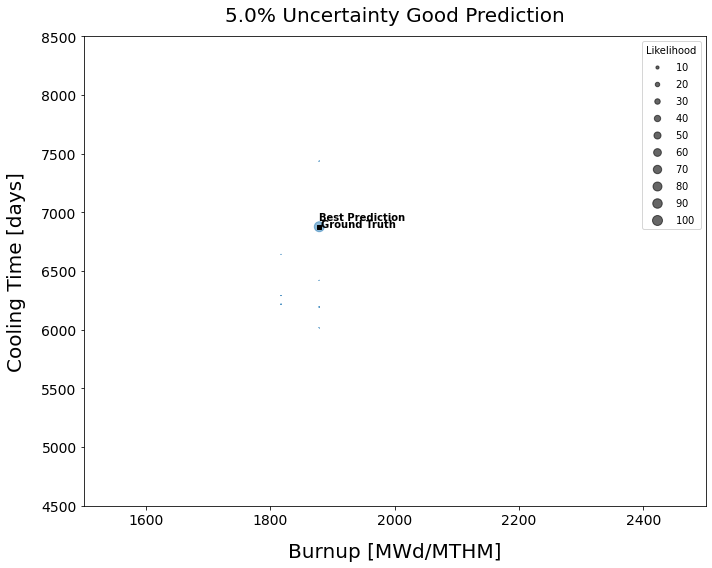

<Figure size 432x288 with 0 Axes>

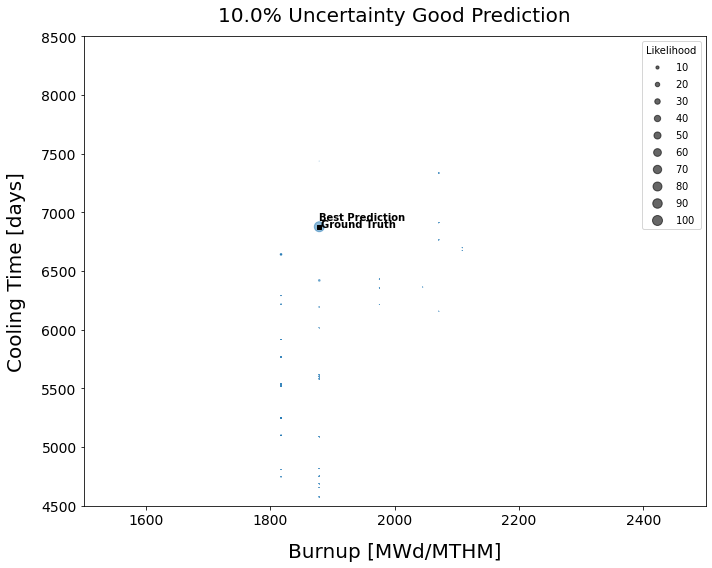

<Figure size 432x288 with 0 Axes>

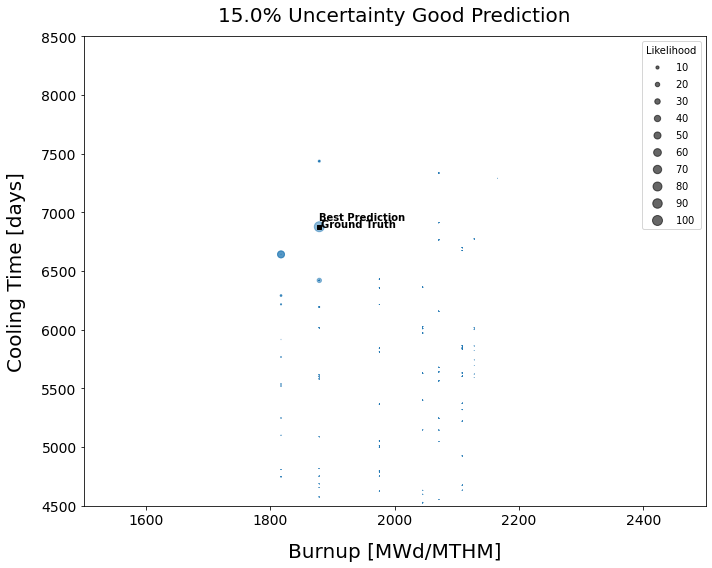

<Figure size 432x288 with 0 Axes>

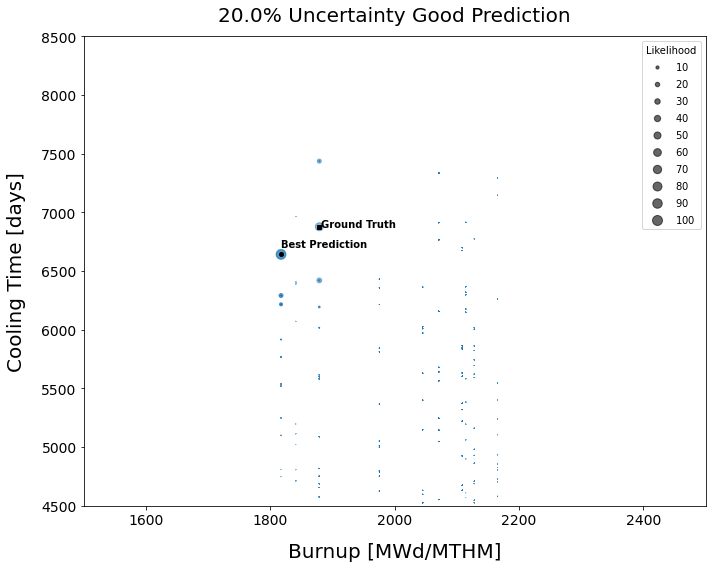

<Figure size 432x288 with 0 Axes>

In [101]:
for i, unc in enumerate(uncs[0:4]):
    zname = 'LLunc'+str(unc)
    title = str(unc*100) + '% Uncertainty'
    vmin = 0#stat_good['unc' + str(unc)].mean
    vmax = stat_good['unc' + str(unc)].minmax[1]
    scatterme('g', ll['good'][['Burnup', 'CoolingTime', zname]], title, zname, vmin, vmax, xlims, ylims)

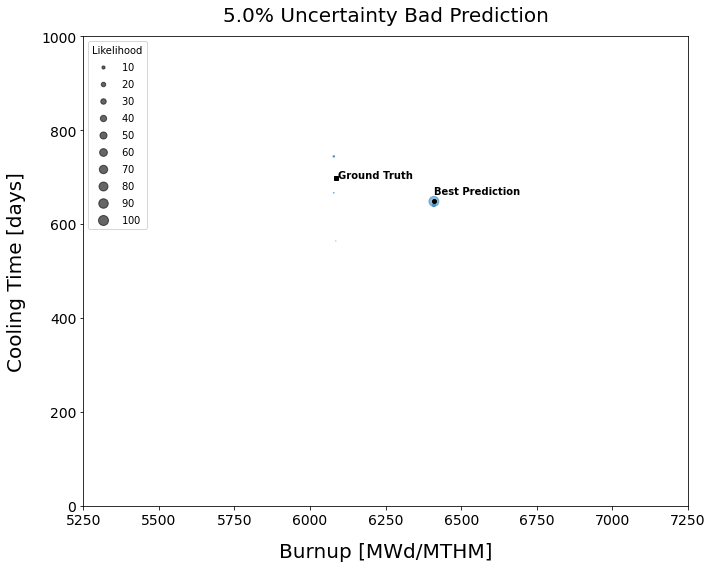

<Figure size 432x288 with 0 Axes>

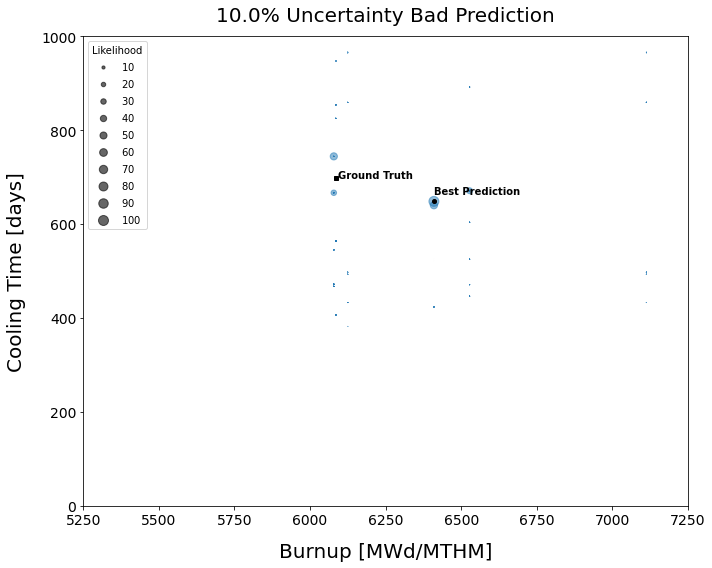

<Figure size 432x288 with 0 Axes>

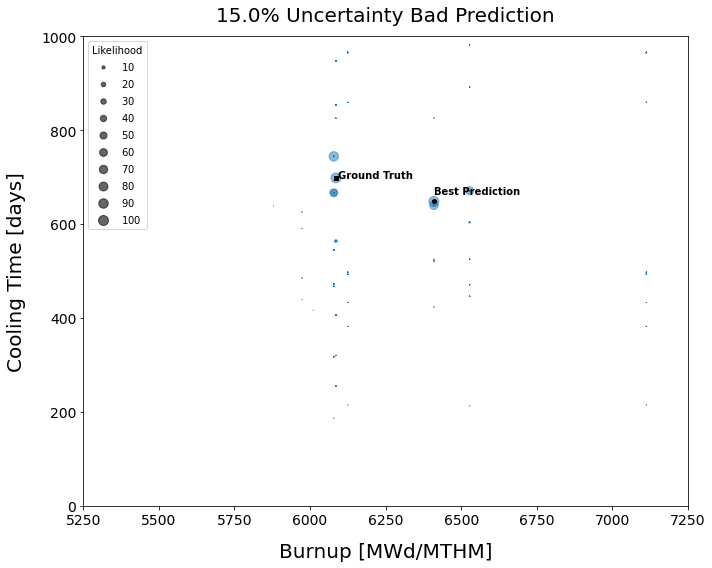

<Figure size 432x288 with 0 Axes>

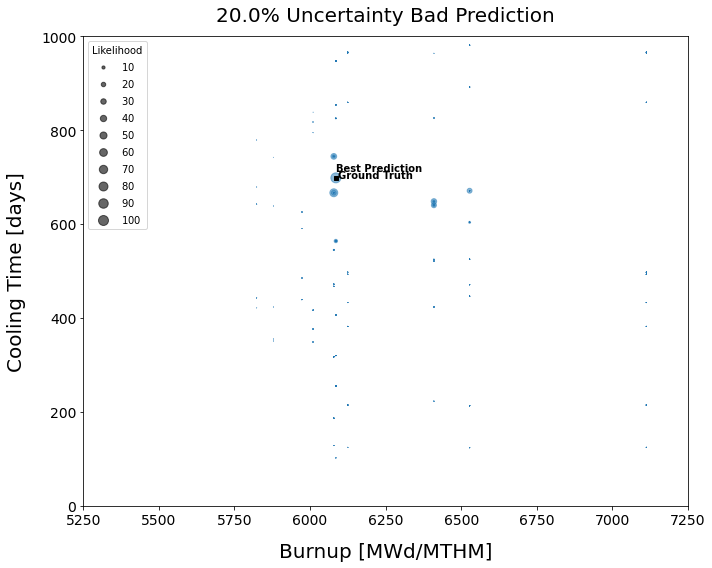

<Figure size 432x288 with 0 Axes>

In [98]:
for i, unc in enumerate(uncs[0:4]):
    zname = 'LLunc'+str(unc)
    title = str(unc*100) + '% Uncertainty'
    vmin = 0#stat_bad['unc' + str(unc)].mean
    vmax = stat_bad['unc' + str(unc)].minmax[1]
    scatterme('b', ll['bad'][['Burnup', 'CoolingTime', zname]], title, zname, vmin, vmax, xlims, ylims)

# 16 Dec 2020 end of update

## _______________________________
### (Unlikely to use heatmaps moving forward)

In [4]:
def plotme(g_or_b, XYZ, title, zname, vmin, vmax):
    fig = plt.figure(figsize=(10, 8))
    #cmap = sns.cubehelix_palette(6, as_cmap=True)
    norm = Normalize(vmin=vmin, vmax=vmax, clip=True)
    ax = fig.add_subplot(111)
    ax.set_title(title, fontsize=20, pad=15)
    ax.set_xlabel('Burnup [MWd/MTHM]', fontsize=20, labelpad=15)
    ax.set_ylabel('Cooling Time [days]', fontsize=20, labelpad=15)
    
    x = XYZ['Burnup']
    y = XYZ['CoolingTime']
    triang_unref = tri.Triangulation(x, y)
    z_unref = XYZ[zname]
    
    refiner = tri.UniformTriRefiner(triang_unref)
    triang, z = refiner.refine_field(z_unref)
    
    surf = ax.tripcolor(triang, z, norm=norm, cmap=cm.viridis, shading='gouraud')
    #surf = ax.tricontourf(triang, z, norm=norm, cmap=cm.viridis)
    if g_or_b == 'g':
        xtr = g['Burnup']
        ytr = g['CoolingTime']
        #ax.set_xlim(60000, 72000)
        #ax.set_ylim(2000, 3500)
    else:
        xtr = b['Burnup']
        ytr = b['CoolingTime']
        #ax.set_xlim(0, 20000)
        #ax.set_ylim(0, 3000)
    xpr = XYZ['Burnup'].iloc[XYZ[zname].idxmax()]
    ypr = XYZ['CoolingTime'].iloc[XYZ[zname].idxmax()]
    plt.plot([xpr], [ypr], marker='o', markersize=4, color="white")
    ax.annotate('Best Prediction', (xpr, ypr), weight='bold', xytext=(0, 5), textcoords='offset points')
    plt.plot([xtr], [ytr], marker='s', markersize=4, color="white")
    ax.annotate('Ground Truth', (xtr, ytr), weight='bold', xytext=(5, 2), textcoords='offset points')
    ax.tick_params(labelsize=14)
    
    cbar = fig.colorbar(surf)
    cbar.ax.set_ylabel('Likelihood', size=20, labelpad=15)
    cbar.ax.tick_params(labelsize=14)
    
    plt.tight_layout()
    plt.show()
    plt.clf()
    #fig.savefig('../plots/llsurf_***.png', bbox_inches='tight', transparent=True)

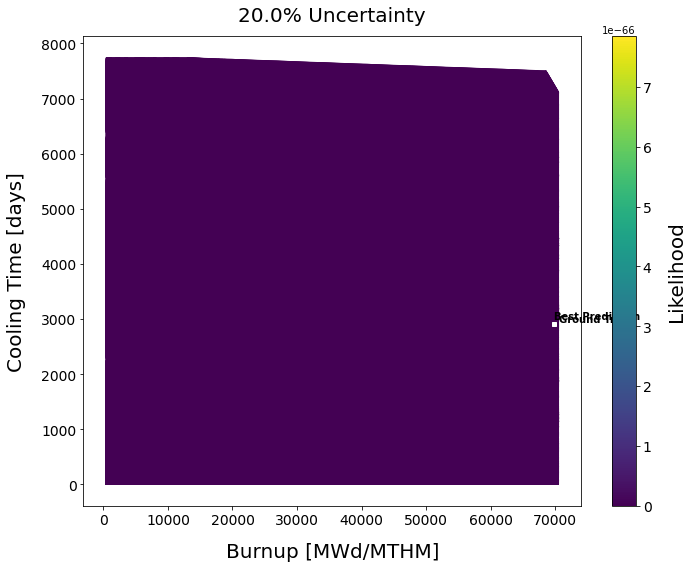

<Figure size 432x288 with 0 Axes>

In [35]:
for i, unc in enumerate(uncs[3:4]):
    zname = 'LLunc'+str(unc)
    title = str(unc*100) + '% Uncertainty'
    vmin = 0
    vmax = stat_good['unc' + str(unc)].minmax[1]
    plotme('g', ll['good'][['Burnup', 'CoolingTime', zname]], title, zname, vmin, vmax)

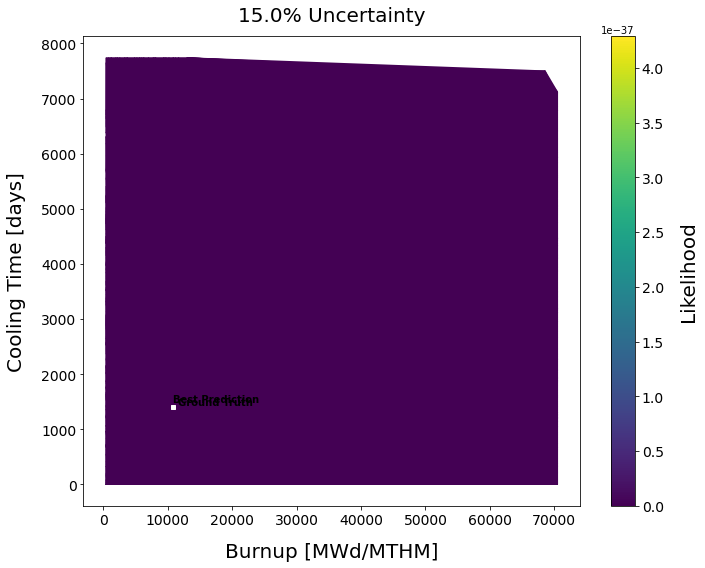

<Figure size 432x288 with 0 Axes>

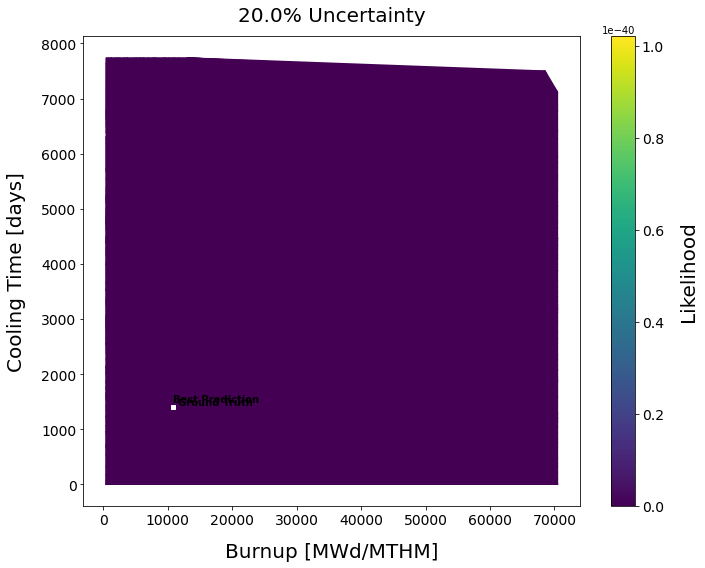

<Figure size 432x288 with 0 Axes>

In [30]:
for i, unc in enumerate(uncs[2:4]):
    zname = 'LLunc'+str(unc)
    title = str(unc*100) + '% Uncertainty'
    vmin = 0#stat_bad['unc' + str(unc)].mean
    vmax = stat_bad['unc' + str(unc)].minmax[1]
    plotme('b', ll['bad'][['Burnup', 'CoolingTime', zname]], title, zname, vmin, vmax)

# 4 Oct 2020 end of update

## _______________________________

# 3. Get LL Pred Results

In [102]:
ll1 = 'LogLikelihood_0.05'
ll2 = 'LogLikelihood_0.1'
ll3 = 'LogLikelihood_0.15'
ll4 = 'LogLikelihood_0.2'
lu1 = 'LLUncertainty_0.05'
lu2 = 'LLUncertainty_0.1'
lu3 = 'LLUncertainty_0.15'
lu4 = 'LLUncertainty_0.2'
lls = [ll1, ll2, ll3, ll4]
lus = [lu1, lu2, lu3, lu4]
uncs = ['5% Uncertainty', '10% Uncertainty', '15% Uncertainty', '20% Uncertainty']

In [103]:
fullXY.head()

,Unnamed: 0,Burnup,CoolingTime,Enrichment,OrigenReactor,ReactorType,ba136,ba138,cs133,cs134,...,LLUncertainty_0.05,Likelihood0.1,LogLikelihood_0.1,LLUncertainty_0.1,Likelihood0.15,LogLikelihood_0.15,LLUncertainty_0.15,Likelihood0.2,LogLikelihood_0.2,LLUncertainty_0.2
0,1,2006.54,0.000839,0.53,ce14x14,pwr,0.000593,0.6109,0.5142,0.002411,...,2.507794e+10,0.0,-6.276547e+10,1.253897e+10,0.0,-2.789577e+10,8.359314e+09,0.0,-1.569137e+10,6.269485e+09
1,2,2006.54,0.592485,0.53,ce14x14,pwr,0.000600,0.6114,0.5204,0.002411,...,2.507794e+10,0.0,-6.276537e+10,1.253897e+10,0.0,-2.789572e+10,8.359314e+09,0.0,-1.569134e+10,6.269485e+09
2,3,2006.54,1.109213,0.53,ce14x14,pwr,0.000607,0.6114,0.5256,0.002410,...,2.507794e+10,0.0,-6.276530e+10,1.253897e+10,0.0,-2.789569e+10,8.359314e+09,0.0,-1.569132e+10,6.269485e+09
3,4,2006.54,8.460400,0.53,ce14x14,pwr,0.000681,0.6114,0.5759,0.002394,...,2.507794e+10,0.0,-6.276469e+10,1.253897e+10,0.0,-2.789542e+10,8.359314e+09,0.0,-1.569117e+10,6.269485e+09
4,5,2006.54,38.415629,0.53,ce14x14,pwr,0.000806,0.6114,0.6069,0.002329,...,2.507794e+10,0.0,-6.276476e+10,1.253897e+10,0.0,-2.789545e+10,8.359314e+09,0.0,-1.569119e+10,6.269486e+09


## Reactor Prediction

In [104]:
data = {}
idx = {}
for ll, lu in zip(lls, lus):
    max_pwr = fullXY[ll].loc[fullXY['ReactorType'] == 'pwr'].max()
    idx_pwr = fullXY[ll].loc[fullXY['ReactorType'] == 'pwr'].idxmax()
    unc_pwr = float(fullXY[lu].loc[fullXY.index == idx_pwr])
    max_bwr = fullXY[ll].loc[fullXY['ReactorType'] == 'bwr'].max()
    idx_bwr = fullXY[ll].loc[fullXY['ReactorType'] == 'bwr'].idxmax()
    unc_bwr = float(fullXY[lu].loc[fullXY.index == idx_bwr])
    max_phwr = fullXY[ll].loc[fullXY['ReactorType'] == 'phwr'].max()
    idx_phwr = fullXY[ll].loc[fullXY['ReactorType'] == 'phwr'].idxmax()
    unc_phwr = float(fullXY[lu].loc[fullXY.index == idx_phwr])
    data[ll] = [max_pwr, max_bwr, max_phwr]
    data[lu] = [unc_pwr, unc_bwr, unc_phwr]
    idx[ll] = [idx_pwr, idx_bwr, idx_phwr]
rxtr = pd.DataFrame(data, columns=[ll1, lu1, ll2, lu2, ll3, lu3, ll4, lu4], index=['pwr', 'bwr', 'phwr'])
rxtr

,LogLikelihood_0.05,LLUncertainty_0.05,LogLikelihood_0.1,LLUncertainty_0.1,LogLikelihood_0.15,LLUncertainty_0.15,LogLikelihood_0.2,LLUncertainty_0.2
pwr,18.967565,3.254686,10.520009,1.627343,5.024011,1.508366,0.943795,1.131275
bwr,2.344970,8.902489,6.566396,4.451245,3.208129,3.008143,-0.083764,2.718742
phwr,-451595.105989,37524.646638,-112875.317334,18762.323319,-50153.587113,12508.215546,-28203.168076,9381.161659


In [105]:
idx

{'LogLikelihood_0.05': [2831, 21324, 24672],
 'LogLikelihood_0.1': [2831, 21324, 24672],
 'LogLikelihood_0.15': [3893, 21315, 24672],
 'LogLikelihood_0.2': [3893, 14034, 24672]}

In [106]:
for ll in lls:
    print(ll)
    for i, index in enumerate(idx[ll]):
        print(fullXY.loc[fullXY.index == idx[ll][i], ['ReactorType', 'Burnup', 'CoolingTime']])

LogLikelihood_0.05
     ReactorType    Burnup  CoolingTime
2831         pwr  40412.05   392.313045
      ReactorType    Burnup  CoolingTime
21324         bwr  37521.68    34.458875
      ReactorType    Burnup  CoolingTime
24672        phwr  13678.58     5.662128
LogLikelihood_0.1
     ReactorType    Burnup  CoolingTime
2831         pwr  40412.05   392.313045
      ReactorType    Burnup  CoolingTime
21324         bwr  37521.68    34.458875
      ReactorType    Burnup  CoolingTime
24672        phwr  13678.58     5.662128
LogLikelihood_0.15
     ReactorType    Burnup  CoolingTime
3893         pwr  39013.38   343.237299
      ReactorType    Burnup  CoolingTime
21315         bwr  37361.88    34.458875
      ReactorType    Burnup  CoolingTime
24672        phwr  13678.58     5.662128
LogLikelihood_0.2
     ReactorType    Burnup  CoolingTime
3893         pwr  39013.38   343.237299
      ReactorType    Burnup  CoolingTime
14034         bwr  36727.11    37.125682
      ReactorType    Burnup  Coo

In [71]:
max_tot = fullXY[ll1].max()
idx = fullXY[ll1].idxmax()
max_tot, idx

(68.62441895096356, 20912)

In [94]:
sim_idx = 13379
top_answer = fullXY.loc[fullXY.index == sim_idx, lbls]
top_answer

,ReactorType,CoolingTime,Enrichment,Burnup,OrigenReactor
13379,bwr,2690.358732,2.88,2010.26,ge9x9-2


In [90]:
sim_idx = 10522
top_answer = XY.loc[XY.index == sim_idx, lbls]
top_answer

,ReactorType,CoolingTime,Enrichment,Burnup,OrigenReactor
10522,bwr,2421.282899,2.89,2024.53,ge7x7-0


In [82]:
xy = pd.read_csv('likelihood_idx5010_15nucs_opusupdate-aug2019.csv')

In [83]:
xy.head()

,Unnamed: 0,Burnup,CoolingTime,Enrichment,OrigenReactor,ReactorType,ba136,ba138,cs133,cs134,...,LLUncertainty_0.05,Likelihood0.1,LogLikelihood_0.1,LLUncertainty_0.1,Likelihood0.15,LogLikelihood_0.15,LLUncertainty_0.15,Likelihood0.2,LogLikelihood_0.2,LLUncertainty_0.2
0,1,2006.54,0.000839,0.53,ce14x14,pwr,0.000593,0.6109,0.5142,0.002411,...,2.507794e+10,0.0,-6.276547e+10,1.253897e+10,0.0,-2.789577e+10,8.359314e+09,0.0,-1.569137e+10,6.269485e+09
1,2,2006.54,0.592485,0.53,ce14x14,pwr,0.000600,0.6114,0.5204,0.002411,...,2.507794e+10,0.0,-6.276537e+10,1.253897e+10,0.0,-2.789572e+10,8.359314e+09,0.0,-1.569134e+10,6.269485e+09
2,3,2006.54,1.109213,0.53,ce14x14,pwr,0.000607,0.6114,0.5256,0.002410,...,2.507794e+10,0.0,-6.276530e+10,1.253897e+10,0.0,-2.789569e+10,8.359314e+09,0.0,-1.569132e+10,6.269485e+09
3,4,2006.54,8.460400,0.53,ce14x14,pwr,0.000681,0.6114,0.5759,0.002394,...,2.507794e+10,0.0,-6.276469e+10,1.253897e+10,0.0,-2.789542e+10,8.359314e+09,0.0,-1.569117e+10,6.269485e+09
4,5,2006.54,38.415629,0.53,ce14x14,pwr,0.000806,0.6114,0.6069,0.002329,...,2.507794e+10,0.0,-6.276476e+10,1.253897e+10,0.0,-2.789545e+10,8.359314e+09,0.0,-1.569119e+10,6.269486e+09


In [85]:
max_tot = xy[ll1].max()
idx = xy[ll1].idxmax()
max_tot, idx

(18.967564797385485, 2831)

In [86]:
sim_idx = 2831
top_answer = xy.loc[xy.index == sim_idx, lbls]
top_answer

,ReactorType,CoolingTime,Enrichment,Burnup,OrigenReactor
2831,pwr,392.313045,3.07,40412.05,w14x14
